In [1]:
import netCDF4 as nc4
import os

import pyart
import datetime
import numpy as np
import numpy.ma as ma
import shutil
import glob
import gzip

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import cmocean
import getpass, socket

import pandas as pd

import cftime

version = 0.1

codepath = os.getcwd()



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
#import sys
#sys.path.append('/home/users/cjwalden/my-packages')

#import kepler_utils

datestr = '20190508';

keplerpath = os.path.join('/gws/pw/j07/ncas_obs_vol2/cao/processing/ncas-radar-mobile-ka-band-1/picasso/L1',datestr);
os.chdir(keplerpath);
files = [os.path.join(keplerpath,f) for f in glob.glob('*.nc')]

In [3]:
print(files[0]);
Radar = pyart.io.read_cfradial(files[1]);
print(Radar.sweep_mode)

/gws/pw/j07/ncas_obs_vol2/cao/processing/ncas-radar-mobile-ka-band-1/picasso/L1/20190508/ncas-radar-mobile-ka-band-1_cao_20190508-110223_rhi_l1_v1.0.nc
{'long_name': 'Sweep mode', 'units': 'unitless', 'standard_name': 'sweep_mode', 'comment': 'Options are: "sector", "coplane", "rhi", "vertical_pointing", "idle", "azimuth_surveillance", "elevation_surveillance", "sunscan", "pointing", "manual_ppi", "manual_rhi"', 'data': masked_array(data=[[b'p', b'p', b'i', --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --, --, --, --, --, --]],
             mask=[[False, False, False,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True,  True,  True,  True,
                     True,  True,  True,  True]],
       fill_value=b'',
            dtype='|S1')}


/home/users/cjwalden/git/kepler-radar-utils
/home/users/cjwalden/git/kepler-radar-utils


/home/users/cjwalden/anaconda3/envs/cao_3_8/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


Name                                                           V1
description                                                  None
timestamp                                                     NaT
begin                                                         NaT
end                                                           NaT
altitudeMode                                                 None
tessellate                                                     -1
extrude                                                         0
visibility                                                     -1
drawOrder                                                    None
icon                                                         None
geometry        LINESTRING Z (-367354.31961780274 6710219.0832...
Name: 0, dtype: object
POINT Z (-367354.31961780274 6710219.083220741 0)
-367354.31961780274 6710219.083220741


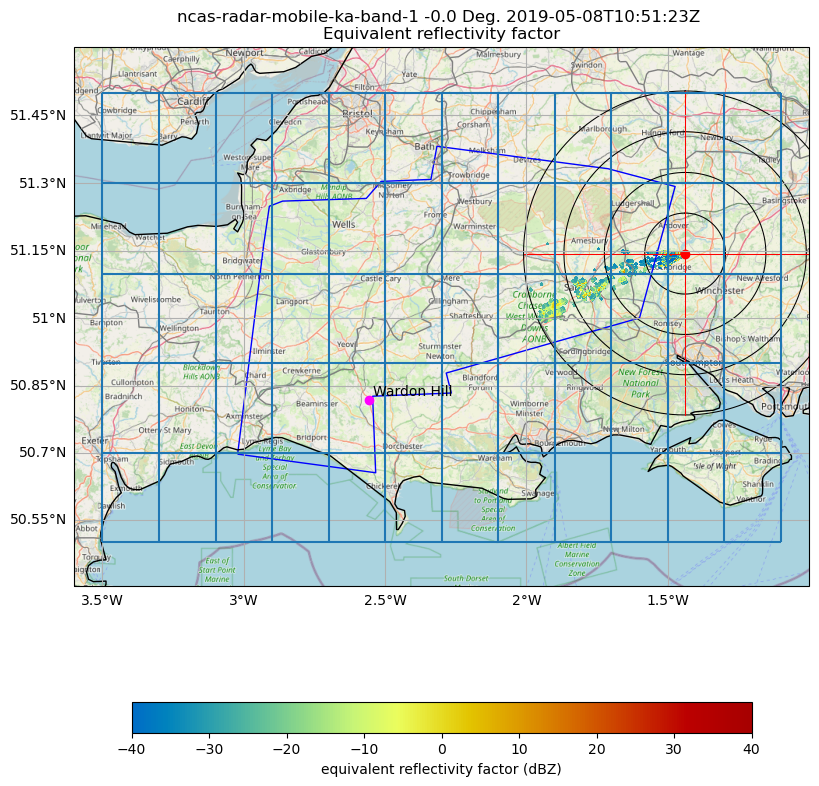

In [6]:
os.chdir(codepath);

print(codepath);
print(os.getcwd());

import geopandas as gpd
import fiona
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
#gpd.io.file.fiona.drvsupport.supported_drivers['kml'] = 'rw#'
#gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
#gpd.io.file.fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
#fiona.drvsupport.supported_drivers['kml'] = 'rw'  # enable KML support which is disabled by default
##fiona.drvsupport.supported_drivers['KML'] = 'rw'  # enable KML support which is disabled by default
#fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'  # enable KML support which is disabled by default
WesconBox1 = gpd.read_file('WesConBox1.kml', driver='LIBKML')
WardonHill = gpd.read_file('WardonHill.kml', driver='LIBKML')

filepath = 'WesConGrid_Verticals.kml';
gdf_list = []
for layer in fiona.listlayers(filepath):    
    gdf = gpd.read_file(filepath, driver='LIBKML', layer=layer)
    gdf_list.append(gdf)

WesConGrid_Verticals = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

filepath = 'WesConGrid_Horizontals.kml';
gdf_list = []
for layer in fiona.listlayers(filepath):    
    gdf = gpd.read_file(filepath, driver='LIBKML', layer=layer)
    gdf_list.append(gdf)

WesConGrid_Horizontals = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

WesConGrid_Outline = gpd.read_file('WesConGrid_Outline.kml', driver='LIBKML')

surface_sites = gpd.read_file('/home/users/cjwalden/surface_sites.kml', driver='LIBKML')
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.io.img_tiles import OSM
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt

osm_tiles = OSM()

display = pyart.graph.RadarMapDisplay(Radar);
# Setting projection and ploting the second tilt
projection = osm_tiles.crs
#ccrs.LambertConformal(
#    central_latitude=Radar.latitude["data"],
#    central_longitude=Radar.longitude["data"],
#)


fig, ax  = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection=projection))
display.plot_ppi_map(
    "DBZ",
    0,
    vmin=-40,
    vmax=40,
    min_lon=-3.6,
    max_lon=-1.0,
    min_lat=50.4,
    max_lat=51.6,
    #lon_lines=np.arange(-3.,-1.,0.2),
    resolution="10m",
    #lat_lines=np.arange(50.5,51.5, 0.1),
    projection=projection,
    fig=fig,
    ax = ax,
    lat_0=Radar.latitude["data"],
    lon_0=Radar.longitude["data"],
    cmap='pyart_HomeyerRainbow',
    colorbar_flag=False
)


ax.set_extent([-3.6, -1.0, 50.4, 51.6],ccrs.PlateCarree())
ax.add_image(osm_tiles, 9)

#ax.add_feature(LAND)
#ax.add_feature(COASTLINE)
gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.bottom_labels = True
gl.top_labels = False
gl.right_labels = False

# Plot range rings at 10, 20, 30, 40km
display.plot_range_ring(10.0, line_style="k-",lw=0.75)
display.plot_range_ring(20.0, line_style="k--",lw=0.75)
display.plot_range_ring(30.0, line_style="k-",lw=0.75)
display.plot_range_ring(40.0, line_style="k--",lw=0.75)

# Plot cross hairs
display.plot_line_xy(
    np.array([-40000.0, 40000.0]), np.array([0.0, 0.0]), line_style="k-",
lw=0.75)
display.plot_line_xy(
    np.array([0.0, 0.0]), np.array([-40000.0, 40000.0]), line_style="k-",
lw=0.75)

# Indicate the radar location with a point
display.plot_point(Radar.longitude["data"], Radar.latitude["data"])
display.plot_colorbar(orient='horizontal',shrink=0.8);
#ax.coastlines('10m')

wesconbox1_ae = WesconBox1.to_crs(projection)
wardonhill_ae = WardonHill.to_crs(projection)
surfacesites_ae = surface_sites.to_crs(projection)
wescongrid_v_ae = WesConGrid_Verticals.to_crs(projection)
wescongrid_h_ae = WesConGrid_Horizontals.to_crs(projection)
wescongrid_outline_ae = WesConGrid_Outline.to_crs(projection)

# Here's what the plot looks like in GeoPandas
wesconbox1_ae.plot(ax=ax,color='None',edgecolor='Blue')
wardonhill_ae.plot(ax=ax,color='Magenta')
surfacesites_ae.plot(ax=ax,color='Magenta')
wescongrid_v_ae.plot(ax=ax);
wescongrid_h_ae.plot(ax=ax);
wescongrid_outline_ae.plot(ax=ax);

print(wescongrid_v_ae.loc[0]);
from shapely.geometry import Point
first = Point(wescongrid_v_ae.loc[0].geometry.coords)

print(first)
xgrid=first.x;
ygrid=first.y;

print(xgrid,ygrid);
#ax.annotate('A',xy=(xgrid,ygrid), xytext=(3,3),textcoords='offset_points')

xwh = wardonhill_ae.loc[0].geometry.x
ywh = wardonhill_ae.loc[0].geometry.y
ax.annotate('Wardon Hill',xy=(xwh,ywh),xytext=(3,3),textcoords='offset points');

plt.show()